In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Cleaned Dataset\loan_data.csv")

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


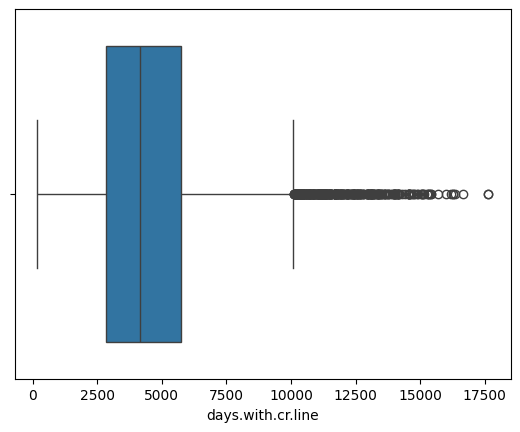

In [5]:
sns.boxplot(x=df['days.with.cr.line'], data=df)
plt.show()

In [6]:
q1 = df['days.with.cr.line'].quantile(0.25)
q3 = df['days.with.cr.line'].quantile(0.75)

iqr = q3 - q1
min_range = q1 - 1.5*iqr
max_range = q3 +1.5*iqr
df = df[df['days.with.cr.line']<max_range]

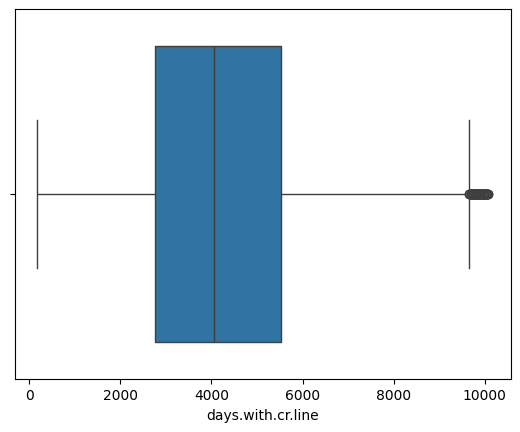

In [7]:
sns.boxplot(x=df['days.with.cr.line'], data=df)
plt.show()

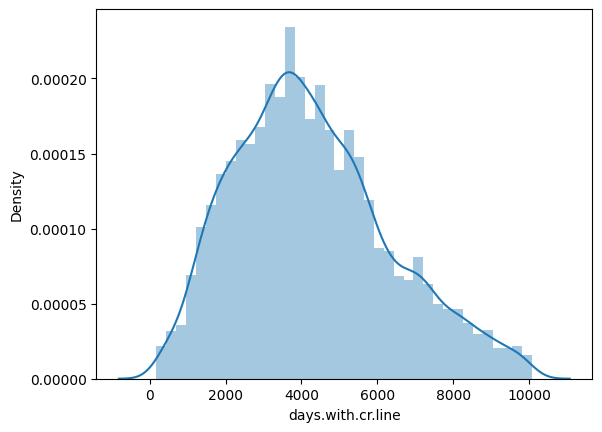

In [8]:
sns.distplot(df['days.with.cr.line'])
plt.show()

# Standardization

In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df[['days.with.cr.line']])

StandardScaler()

In [14]:
df['days.with.cr.line'] = ss.transform(df[['days.with.cr.line']])

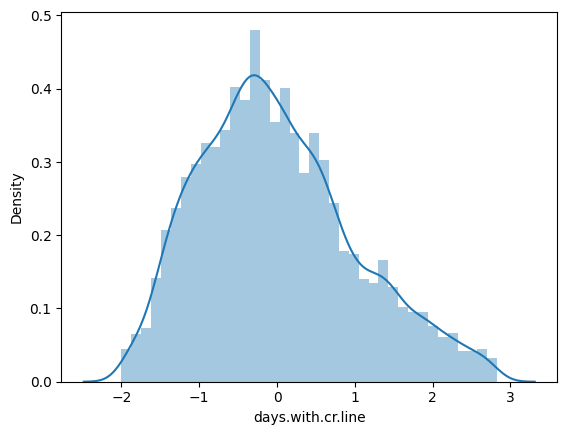

In [15]:
sns.distplot(df['days.with.cr.line'])
plt.show()

In [16]:
df['days.with.cr.line'].describe()

count    9.232000e+03
mean     9.851546e-17
std      1.000054e+00
min     -2.001218e+00
25%     -7.418449e-01
50%     -1.124123e-01
75%      6.048685e-01
max      2.829819e+00
Name: days.with.cr.line, dtype: float64

In [18]:
ss = StandardScaler()

for col in df.select_dtypes(include='int64').columns:
    df[col] = ss.fit_transform(df[[col]])

In [19]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9.232000e+03,9232.000000,9232.000000,9232.000000,9232.000000,9.232000e+03,9.232000e+03,9.232000e+03,9232.000000,9.232000e+03,9.232000e+03,9.232000e+03,9.232000e+03
mean,2.462886e-16,0.122872,317.496951,10.924095,12.604648,-3.078608e-16,9.851546e-17,1.231443e-17,47.054137,-9.851546e-17,-4.310051e-17,7.003833e-17,-5.233634e-17
std,1.000054e+00,0.026727,205.995430,0.612794,6.876469,1.000054e+00,1.000054e+00,1.000054e+00,28.974124,1.000054e+00,1.000054e+00,1.000054e+00,1.000054e+00
min,-2.029166e+00,0.060000,15.670000,7.547502,0.000000,-2.614830e+00,-2.001218e+00,-5.035785e-01,0.000000,-7.174835e-01,-2.976385e-01,-2.364545e-01,-4.386989e-01
25%,4.928132e-01,0.103900,163.622500,10.550591,7.230000,-7.479384e-01,-7.418449e-01,-4.068350e-01,23.100000,-7.174835e-01,-2.976385e-01,-2.364545e-01,-4.386989e-01
50%,4.928132e-01,0.122900,267.965000,10.915088,12.650000,-8.119120e-02,-1.124123e-01,-2.432410e-01,46.600000,-2.638291e-01,-2.976385e-01,-2.364545e-01,-4.386989e-01
75%,4.928132e-01,0.141100,428.650000,11.289782,17.940000,7.189054e-01,6.048685e-01,4.763467e-02,71.025000,1.898253e-01,-2.976385e-01,-2.364545e-01,-4.386989e-01
max,4.928132e-01,0.216400,940.140000,14.528354,29.950000,3.119195e+00,2.829819e+00,3.658006e+01,119.000000,1.425311e+01,2.366037e+01,1.877877e+01,2.279468e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
for col in df.select_dtypes(include=["int64", "float64"]).columns:
    df[col] = ms.fit_transform(df[[col]])

In [8]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1.0,debt_consolidation,0.376598,0.879888,0.544762,0.650200,0.581395,0.312754,0.023898,0.437815,0.000000,0.000000,0.0,0.0
1,1.0,credit_card,0.301151,0.229916,0.506334,0.476969,0.441860,0.147818,0.027848,0.644538,0.000000,0.000000,0.0,0.0
2,1.0,debt_consolidation,0.484015,0.379883,0.404820,0.388184,0.325581,0.259495,0.002908,0.215126,0.030303,0.000000,0.0,0.0
3,1.0,debt_consolidation,0.260870,0.158653,0.544762,0.270360,0.465116,0.144379,0.027885,0.615126,0.030303,0.000000,0.0,0.0
4,1.0,credit_card,0.528133,0.094378,0.537503,0.499666,0.255814,0.222613,0.003926,0.331933,0.000000,0.076923,0.0,0.0


In [9]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.400512,0.328209,0.484843,0.420784,0.459750,0.250948,0.014009,0.393271,0.047802,0.012593,0.012424,0.160054
std,0.396245,0.171656,0.223989,0.088071,0.229772,0.176607,0.143000,0.027959,0.243819,0.066674,0.042017,0.052425,0.366676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.280691,0.160200,0.431310,0.240738,0.325581,0.151254,0.002640,0.189916,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.397059,0.273973,0.484379,0.422730,0.441860,0.226848,0.007120,0.389076,0.030303,0.000000,0.000000,0.000000
75%,1.000000,0.515985,0.451169,0.536294,0.599132,0.581395,0.317911,0.015115,0.595798,0.060606,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


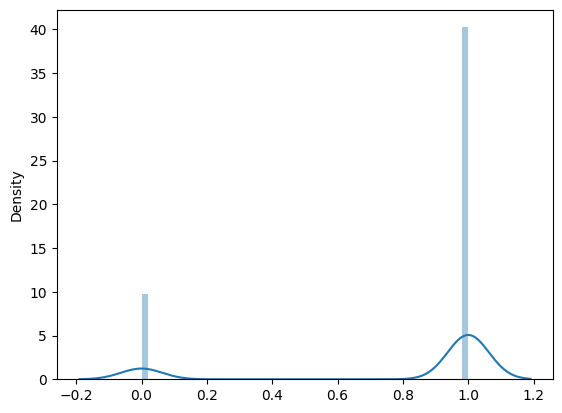

In [10]:
sns.distplot(x=df['credit.policy'])
plt.show()